In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal.windows import gaussian

In [2]:
y, sr = librosa.load(librosa.example("libri1"), sr=None)

In [11]:
suby = y[2000:6000]

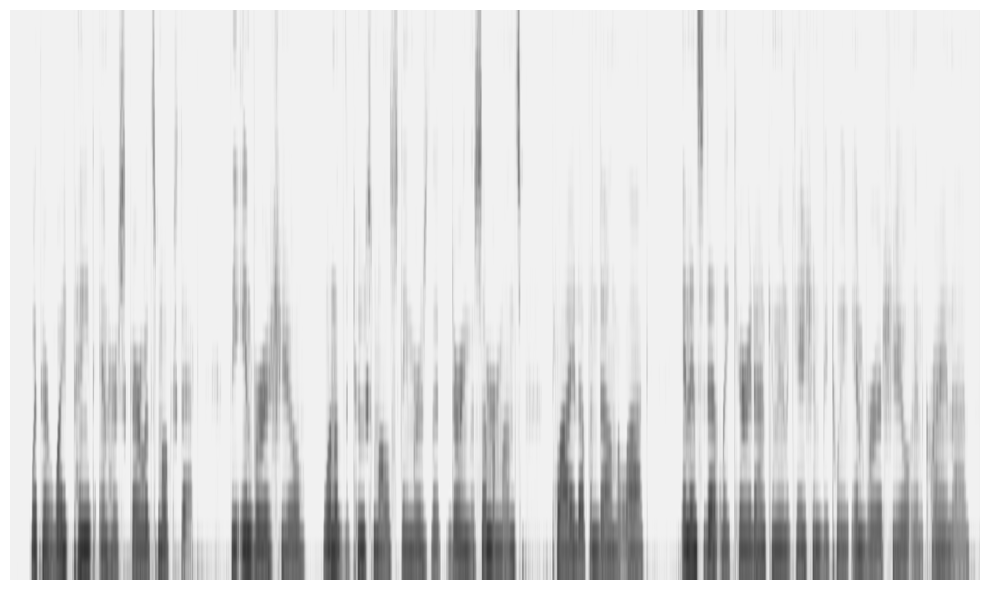

In [13]:
window_length = int(0.005 * sr)  # ~5 ms window length
hop_length = int(0.0005 * sr)   # Smaller hop length for smoother time resolution (e.g., 0.5 ms)
n_fft = 2 ** int(np.ceil(np.log2(window_length)))  # FFT size matching window length

# Generate Gaussian window
gaussian_window = gaussian(window_length, std=window_length / 6)

# Compute STFT with Gaussian window
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=window_length, window=gaussian_window)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Apply dynamic range cutoff
dynamic_range = 50  # Praat's dynamic range
S_db = np.clip(S_db, a_min=S_db.max() - dynamic_range, a_max=None)

# Frequency range (e.g., 0 to 5000 Hz for speech analysis)
max_freq = 5000  # in Hz
max_bin = int(max_freq / (sr / n_fft))

# Resample to smooth spectrogram (optional step to improve interpolation)
smooth_factor = 2  # Factor by which to upsample time and frequency axes
time_resampled = librosa.resample(S_db, orig_sr=1, target_sr=smooth_factor)  # Smooth along time axis
freq_resampled = np.repeat(time_resampled[:max_bin, :], smooth_factor, axis=0)  # Smooth along frequency axis

# Plot in grayscale
plt.figure(figsize=(10, 6))
plt.imshow(freq_resampled, aspect='auto', origin='lower', cmap='Greys',
           extent=[0, len(y) / sr, 0, max_freq], interpolation='spline16')  # Spline interpolation for smoothness
plt.axis('off')  # Hide axes for Praat-like minimalism
plt.tight_layout()
plt.show()